In [1]:
import os, json
from pprint import pprint

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from src import ROWS, COLS, BOARD_SIZE, SHIP_LENS
from src.placements import *
from src.strategy import *
from src.game import Game, Simulation
from src.board import Board, SquareState

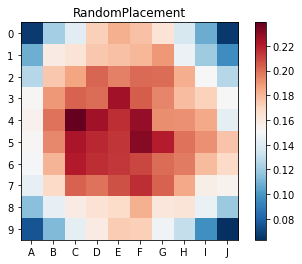

In [4]:
# probability of finding a ship in a given square with RandomPlacement
RandomPlacement.show_distribution(1000)

In [5]:
# simulate random strategy against random placement
sim = Simulation(RandomStrategy, RandomPlacement).run(max_secs=10)
pprint(sim.metrics())

Simulating 10 seconds of RandomStrategy and RandomPlacement in 8 processes
{'avg_turns': 95.50923361034164,
 'n_simulations': 2166,
 'std_dev_turns': 4.916726465407506,
 'time': {'cumulative_sec': {'init': 44.667692433693446,
                             'play': 35.366798148839734,
                             'total': 80.0639519180404},
          'per_game_sec': {'init': 0.02062220333965533,
                           'play': 0.016328161656897384,
                           'total': 0.03696396672116362},
          'per_turn_ms': 0.17095898521720929},
 'total_turns': 206873}


In [6]:
# simulate elimination strategy against random placement
sim = Simulation(EliminationStrategy, RandomPlacement).run(max_secs=10)
pprint(sim.metrics())

Simulating 10 seconds of EliminationStrategy and RandomPlacement in 8 processes
{'avg_turns': 64.2,
 'n_simulations': 10,
 'std_dev_turns': 10.6,
 'time': {'cumulative_sec': {'init': 0.758241614094004,
                             'play': 89.47537483426277,
                             'total': 90.23376370198093},
          'per_game_sec': {'init': 0.0758241614094004,
                           'play': 8.947537483426277,
                           'total': 9.023376370198093},
          'per_turn_ms': 139.36974273249652},
 'total_turns': 642}
